# Data Understanding

The dataset contains transactions made by credit cards in September 2013 by European cardholders.
This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-sensitive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

Given the class imbalance ratio, we recommend measuring the accuracy using the Area Under the Precision-Recall Curve (AUPRC). Confusion matrix accuracy is not meaningful for unbalanced classification.

# Importing Libraries

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
warnings.filterwarnings('ignore')

# Data Exploration

In [29]:
dir = r'E:\ML\projects\2 Credit Card Fraud Detection\data'
df = pd.read_csv(os.path.join(dir,'train.csv'))

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170884 entries, 0 to 170883
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    170884 non-null  float64
 1   V1      170884 non-null  float64
 2   V2      170884 non-null  float64
 3   V3      170884 non-null  float64
 4   V4      170884 non-null  float64
 5   V5      170884 non-null  float64
 6   V6      170884 non-null  float64
 7   V7      170884 non-null  float64
 8   V8      170884 non-null  float64
 9   V9      170884 non-null  float64
 10  V10     170884 non-null  float64
 11  V11     170884 non-null  float64
 12  V12     170884 non-null  float64
 13  V13     170884 non-null  float64
 14  V14     170884 non-null  float64
 15  V15     170884 non-null  float64
 16  V16     170884 non-null  float64
 17  V17     170884 non-null  float64
 18  V18     170884 non-null  float64
 19  V19     170884 non-null  float64
 20  V20     170884 non-null  float64
 21  V21     17

In [31]:
#No Missing Values
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,170884.000000,170884.000000,170884.000000,170884.000000,170884.000000,170884.000000,170884.000000,170884.000000,170884.000000,170884.000000,...,170884.000000,170884.000000,170884.000000,170884.000000,170884.000000,170884.000000,170884.000000,170884.000000,170884.000000,170884.000000
mean,94966.107886,-0.001070,-0.000904,-0.002722,-0.002603,0.000151,0.000779,-0.000811,-0.002327,-0.000622,...,0.000957,0.000056,0.000475,-0.000894,-0.000593,-0.000738,0.000404,0.000422,88.511723,0.001785
std,47464.723773,1.958944,1.650481,1.521820,1.416490,1.394123,1.338331,1.260122,1.208709,1.098393,...,0.743974,0.726681,0.620647,0.605148,0.521128,0.481720,0.404540,0.314973,256.737144,0.042210
min,0.000000,-46.855047,-63.344698,-48.325589,-5.683171,-113.743307,-23.496714,-43.557242,-73.216718,-13.434066,...,-34.830382,-10.933144,-36.666000,-2.836627,-7.081325,-2.604551,-9.895244,-15.430084,0.000000,0.000000
25%,54348.000000,-0.922071,-0.599127,-0.896376,-0.848978,-0.691840,-0.768986,-0.554440,-0.209596,-0.642036,...,-0.228068,-0.542831,-0.161063,-0.354552,-0.318057,-0.327631,-0.070719,-0.053019,5.637500,0.000000
50%,84923.500000,0.016603,0.065839,0.177007,-0.020895,-0.054185,-0.274228,0.040417,0.021461,-0.051777,...,-0.029547,0.006488,-0.010688,0.040433,0.016916,-0.051262,0.001520,0.011216,22.020000,0.000000
75%,139404.000000,1.316250,0.802518,1.028302,0.738812,0.612154,0.400359,0.569221,0.326026,0.595095,...,0.186681,0.528971,0.147814,0.437888,0.350188,0.240718,0.091713,0.078480,77.650000,0.000000
max,172792.000000,2.451888,22.057729,4.226108,16.875344,34.099309,73.301626,120.589494,18.282168,10.392889,...,27.202839,10.503090,22.528412,4.584549,6.070850,3.517346,31.612198,16.129609,25691.160000,1.000000


all features are scaled due to applying PCA except Time and Amount Features

In [32]:
df.shape

(170884, 31)

In [33]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,119191.0,2.052427,-0.133236,-1.740621,0.277935,0.337999,-0.826933,0.334629,-0.227039,0.267655,...,-0.006518,0.121300,0.037733,-0.356498,0.147822,0.569149,-0.103929,-0.091958,8.73,0
1,71750.0,1.220356,-0.159191,-0.444349,-0.094437,0.104457,-0.345790,0.170867,-0.094996,0.187572,...,-0.088775,-0.364654,-0.140851,-0.707308,0.415661,1.087767,-0.102532,-0.008335,59.95,0
2,151977.0,0.892824,-1.440698,-0.637940,3.912871,0.099291,2.433288,-0.308891,0.603227,-0.113826,...,0.484969,0.487304,-0.122694,-0.598803,-0.594563,0.062841,-0.033426,0.038254,460.65,0
3,55709.0,-3.146021,2.247634,0.901397,0.146162,-2.109360,-0.148312,-1.533191,2.073663,0.499394,...,0.050567,-0.037019,0.107000,0.392857,0.303597,0.379544,-0.148990,0.074965,4.78,0
4,66654.0,1.194996,-0.007495,0.301285,0.750199,-0.297494,-0.405836,0.060410,-0.150482,0.400860,...,-0.234931,-0.545566,-0.089418,-0.064036,0.527305,0.294221,-0.025980,0.015637,44.31,0


In [34]:
df.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
170879,137874.0,-2.314356,-1.477150,1.847313,-0.171896,0.929503,0.331769,-0.180278,0.296973,0.167303,...,0.130012,0.319415,0.328271,0.300380,0.608955,-0.230660,-0.040699,0.266017,182.88,0
170880,6559.0,-1.775889,-0.059785,2.371322,-2.628981,0.151867,-0.650695,-0.433332,0.027177,3.370020,...,-0.097743,0.610452,-0.577917,-0.282703,0.442635,0.007669,0.455482,0.013437,14.00,0
170881,159020.0,1.879717,-0.557359,-0.426212,-0.041480,-0.240394,0.650912,-0.818833,0.401973,1.405719,...,-0.072211,-0.025659,0.489627,-1.090862,-0.781050,-0.166246,0.055082,-0.050150,1.00,0
170882,34859.0,0.879168,-0.494534,0.921462,1.565359,-0.967113,0.040689,-0.338960,0.180871,1.020498,...,0.060998,0.193461,-0.130303,0.411289,0.476105,-0.275632,0.045707,0.044743,123.50,0
170883,130876.0,-0.887659,1.538844,-0.540660,-0.550646,-0.246239,-1.235993,0.341516,0.622988,-0.264380,...,-0.202022,-0.576635,0.176584,0.049118,-0.376414,0.145608,0.117500,0.020189,13.98,0


In [35]:
print(df[df.Class == 0].duplicated().sum())
print(df[df.Class == 1].duplicated().sum())

440
8


In [36]:
df.drop_duplicates(inplace = True)

# EDA

In [37]:
df['Class'].value_counts()

Class
0    170139
1       297
Name: count, dtype: int64

Text(0.5, 1.0, 'Class Distribution')

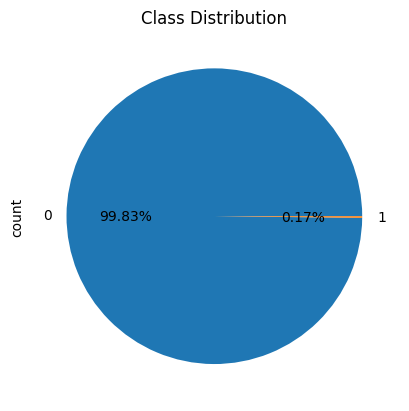

In [38]:
df['Class'].value_counts().plot.pie(
    autopct = '%1.2f%%',
)
plt.title('Class Distribution')

## Correlation Matrix

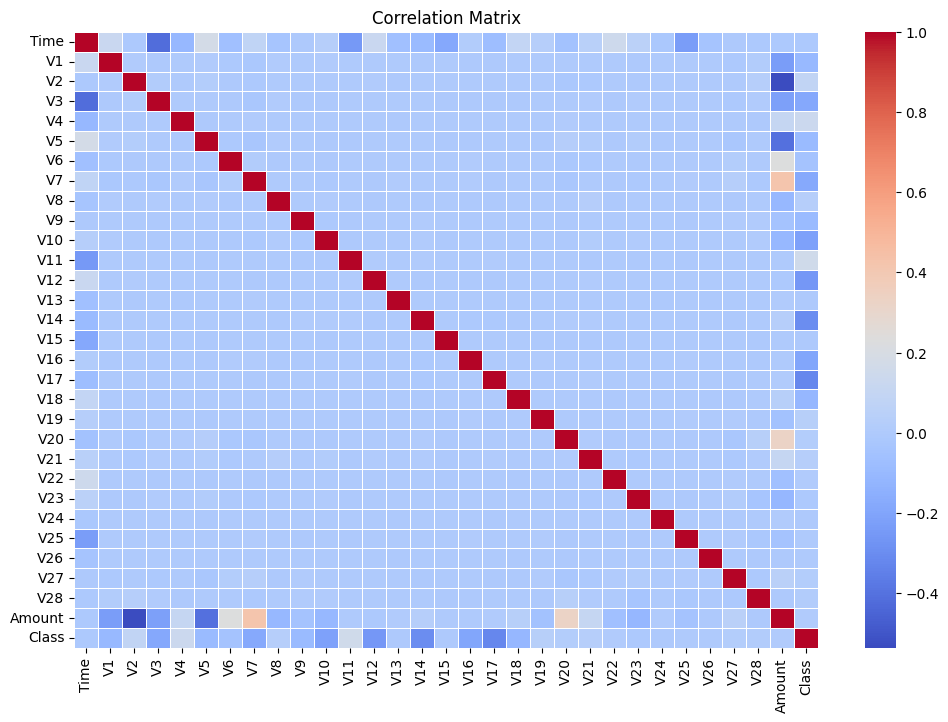

In [39]:
plt.figure(figsize=(12,8))
corr = df.corr()
sns.heatmap(corr, cmap = 'coolwarm',linewidth = 0.5)
plt.title('Correlation Matrix')
plt.show()

Class
0    297
1    297
Name: count, dtype: int64


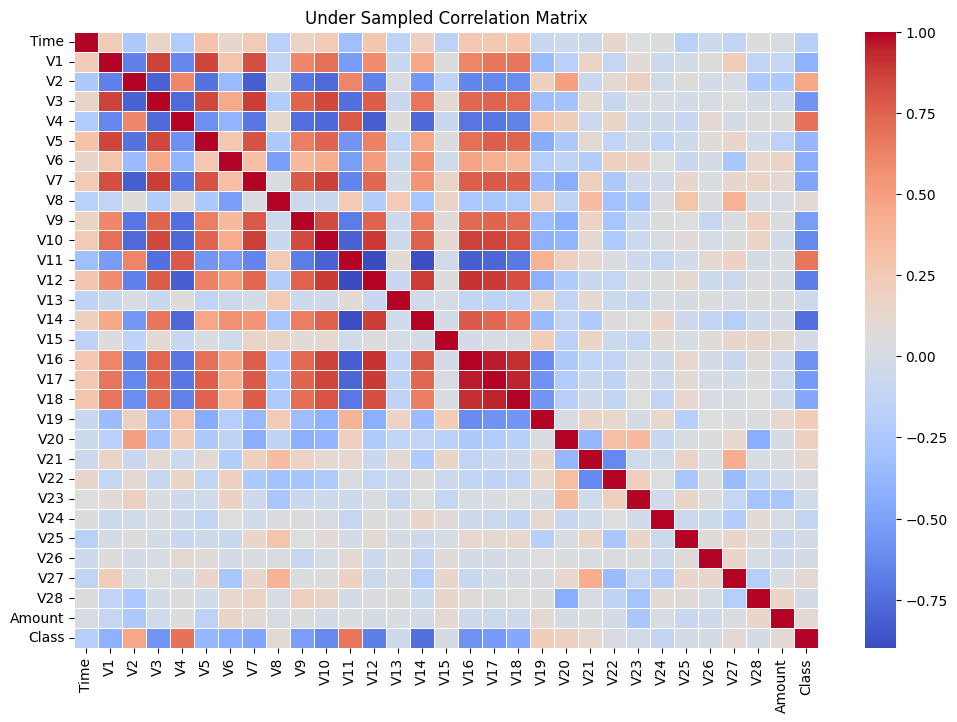

In [40]:
class_1 = df[df.Class == 1]
class_0 = df[df.Class == 0]
class_0_sample = class_0.sample(n=len(class_1) , random_state = 42)
under_sampled_df = pd.concat([class_0_sample,class_1] ,axis = 0)
print(under_sampled_df['Class'].value_counts())
plt.figure(figsize=(12,8))
corr = under_sampled_df.corr()
sns.heatmap(corr, cmap = 'coolwarm',linewidth = 0.5)
plt.title('Under Sampled Correlation Matrix')
plt.show()

<pre>
    negative correlated features :   v10 , v12 , v14 , v17
    positive correlated features :   v2  , v4  , v11
</pre>

## BoxPlot

In [41]:
def show_distributions(df):

    fig,axs = plt.subplots(6,5,figsize=(15,12))
    data = df.copy()
    data.Class = data.Class.map({0 : 'No Fraud' , 1 : 'Fraud'})
    for i,ax in enumerate(axs.flat):
        feature = df.columns[i]
        sns.boxplot(x='Class',y = feature, ax = ax,data = data, palette ='coolwarm')
        
        ax.set_title(feature)
    plt.suptitle('Distribution of Features Per Class')
    plt.tight_layout()
    plt.show()

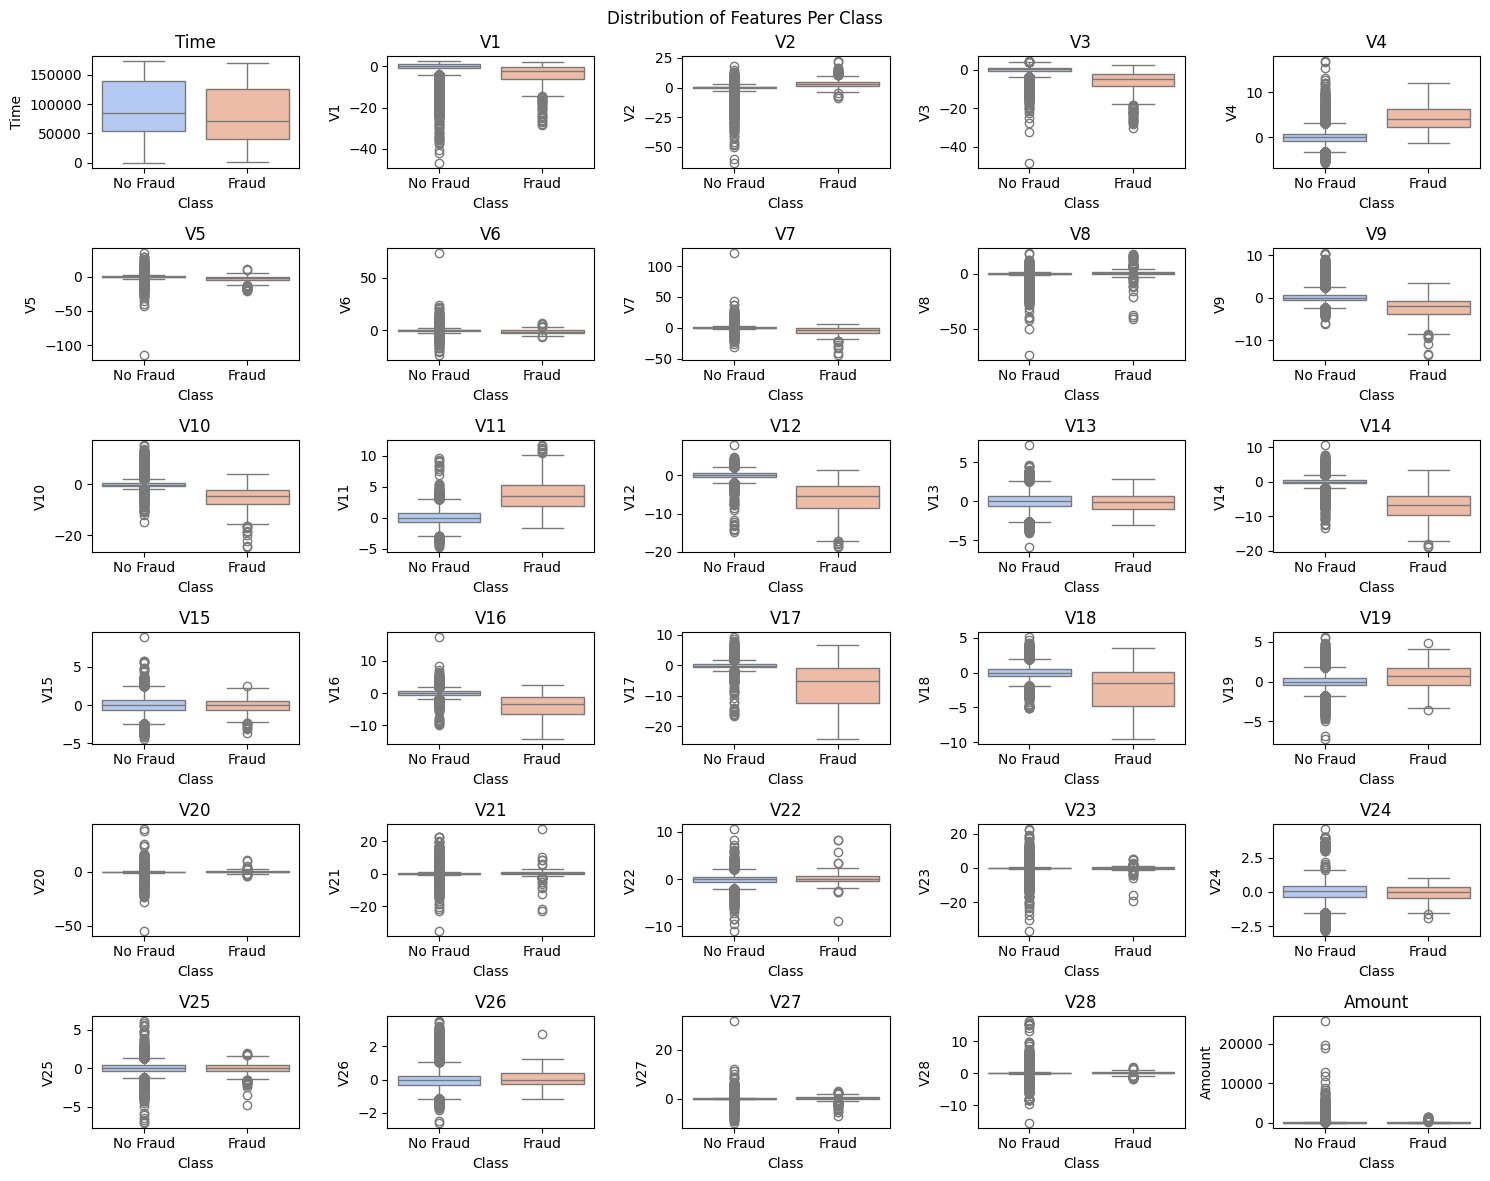

In [42]:
show_distributions(df)

## Time

In [43]:
#time in seconds,let's convert it to hours
df['Hour'] = df['Time']//3600

In [44]:
df.Hour.sort_values().unique()

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.,
       26., 27., 28., 29., 30., 31., 32., 33., 34., 35., 36., 37., 38.,
       39., 40., 41., 42., 43., 44., 45., 46., 47.])

In [45]:
# we have 2 days of transactions , let's cycle the column to match 24-hour system
df.Hour = df.Hour % 24

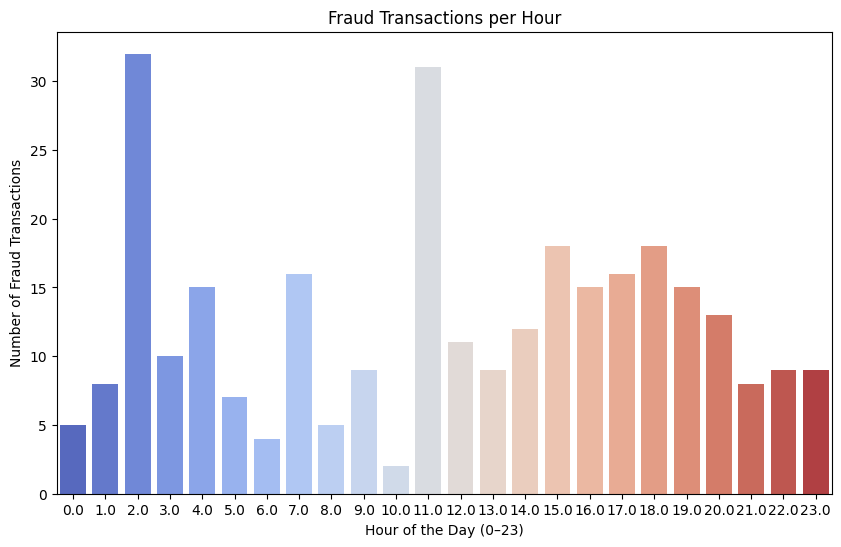

In [46]:
# Separate fraud and non-fraud
class_1 = df[df.Class == 1]
class_0 = df[df.Class == 0]

# Group by Hour and count fraud transactions
group = class_1.groupby('Hour')['Class'].count()

# Plot
plt.figure(figsize=(10,6))
sns.barplot(x=group.index, y=group.values, palette='coolwarm')

plt.xlabel('Hour of the Day (0–23)')
plt.ylabel('Number of Fraud Transactions')
plt.title('Fraud Transactions per Hour')
plt.show()


highest number of Fraud transactions occurs in 2 > 11 > 15 > 18 ... 

In [47]:
def label_hour(hour):
    if 0 <= hour < 6:
        return 'Night'
    elif 6 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 18:
        return 'Afternoon'
    else:
        return 'Evening'

In [48]:
df['Timelabel'] = df['Hour'].apply(label_hour)
df['Timelabel'].value_counts()

Timelabel
Afternoon    58055
Evening      55834
Morning      42338
Night        14209
Name: count, dtype: int64

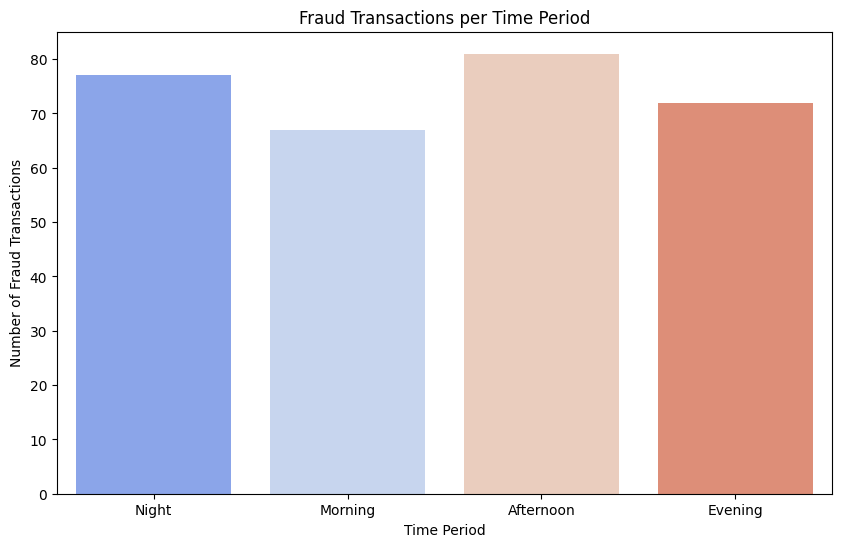

In [49]:
# Separate fraud and non-fraud
class_1 = df[df.Class == 1]
class_0 = df[df.Class == 0]

# Group by Hour and count fraud transactions
group = class_1.groupby('Timelabel')['Class'].count().reindex(['Night','Morning','Afternoon','Evening'])

# Plot
plt.figure(figsize=(10,6))
sns.barplot(x=group.index, y=group.values, palette='coolwarm')

plt.xlabel('Time Period')
plt.ylabel('Number of Fraud Transactions')
plt.title('Fraud Transactions per Time Period')
plt.show()

highest number of Fraud transactions occurs in Afternoon > Night > Evening > Morning 

## Feature Importance

In [50]:
from sklearn.ensemble import RandomForestClassifier
df['Hour_sin'] = np.sin(2 * np.pi * df['Hour'] / 24)
df['Hour_cos'] = np.cos(2 * np.pi * df['Hour'] / 24)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 170436 entries, 0 to 170883
Data columns (total 35 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   Time       170436 non-null  float64
 1   V1         170436 non-null  float64
 2   V2         170436 non-null  float64
 3   V3         170436 non-null  float64
 4   V4         170436 non-null  float64
 5   V5         170436 non-null  float64
 6   V6         170436 non-null  float64
 7   V7         170436 non-null  float64
 8   V8         170436 non-null  float64
 9   V9         170436 non-null  float64
 10  V10        170436 non-null  float64
 11  V11        170436 non-null  float64
 12  V12        170436 non-null  float64
 13  V13        170436 non-null  float64
 14  V14        170436 non-null  float64
 15  V15        170436 non-null  float64
 16  V16        170436 non-null  float64
 17  V17        170436 non-null  float64
 18  V18        170436 non-null  float64
 19  V19        170436 non-null  

In [51]:
df = pd.get_dummies(df,columns = ['Timelabel'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 170436 entries, 0 to 170883
Data columns (total 38 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Time                 170436 non-null  float64
 1   V1                   170436 non-null  float64
 2   V2                   170436 non-null  float64
 3   V3                   170436 non-null  float64
 4   V4                   170436 non-null  float64
 5   V5                   170436 non-null  float64
 6   V6                   170436 non-null  float64
 7   V7                   170436 non-null  float64
 8   V8                   170436 non-null  float64
 9   V9                   170436 non-null  float64
 10  V10                  170436 non-null  float64
 11  V11                  170436 non-null  float64
 12  V12                  170436 non-null  float64
 13  V13                  170436 non-null  float64
 14  V14                  170436 non-null  float64
 15  V15                  1

In [52]:
X = df.drop(columns = ['Class'],axis = 1)
y = df['Class']
rf = RandomForestClassifier(n_estimators = 50 , random_state = 42)
rf.fit(X,y)

,n_estimators,50
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


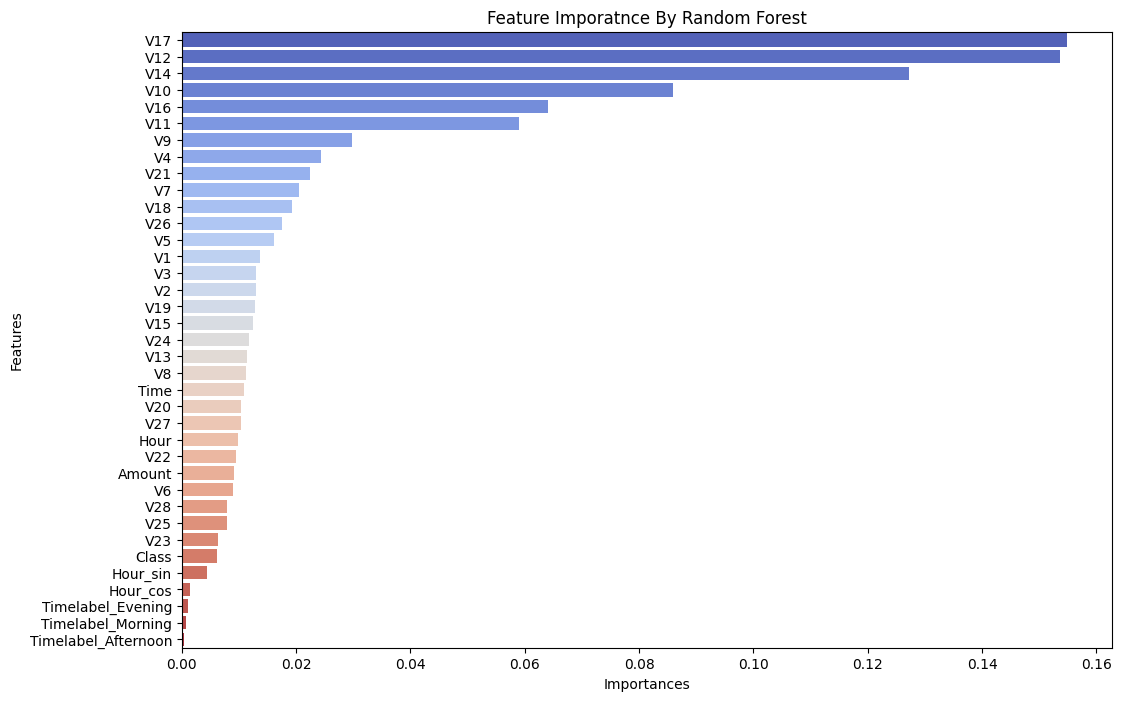

In [53]:
importances = rf.feature_importances_
feature_names = df.columns
sorted_idx = np.argsort(importances)[::-1]
plt.figure(figsize=(12,8))
sns.barplot(x=importances[sorted_idx] , y = [feature_names[i] for i in sorted_idx] , palette = 'coolwarm')
plt.title('Feature Imporatnce By Random Forest')
plt.xlabel('Importances')
plt.ylabel('Features')
plt.show()

In [54]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class', 'Hour', 'Hour_sin', 'Hour_cos', 'Timelabel_Afternoon',
       'Timelabel_Evening', 'Timelabel_Morning', 'Timelabel_Night'],
      dtype='object')

In [55]:
features = ['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class']
df = df[features]

In [56]:
df.to_csv('newtrain.csv',index=False)